In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
# pisahin X sama y lagi
X = df.drop('sales',axis=1)
y = df['sales']

## SciKit Learn 

---

## Polynomial Regression

**From Preprocessing, import PolynomialFeatures, which will help us transform our original data set by adding polynomial features**

We will go from the equation in the form (shown here as if we only had one x feature):

$$\hat{y} = \beta_0 + \beta_1x_1 + \epsilon $$

and create more features from the original x feature for some *d* degree of polynomial.

$$\hat{y} = \beta_0 + \beta_1x_1 + \beta_1x^2_1 +  ... + \beta_dx^d_1 + \epsilon$$

Then we can call the linear regression model on it, since in reality, we're just treating these new polynomial features x^2, x^3, ... x^d as new features. Obviously we need to be careful about choosing the correct value of *d* , the degree of the model. Our metric results on the test set will help us with this!

**The other thing to note here is we have multiple X features, not just a single one as in the formula above, so in reality, the PolynomialFeatures will also take *interaction* terms into account for example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].**

In [5]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# PolynomialFeatures parameter
# degree itu pangkat nya mau pangkat brp
# interaction_only, artinya kita gamau yang pangkatnya, cuma mau yg antar featurenya

In [6]:
# kita buat instance nya
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [8]:
# fit-transform
# kita skrg fit dulu datasetnya
# fit itu ga ngapa2in cuma cek datasetnya, gabakal return apa2
# kita ga perlu split train test soalnya ini cuma converter, bukan ML modelnya

In [11]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [12]:
# terus baru bisa kita transform
polynomial_converter.transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [13]:
# cuma karena stepnya pasti selalu fit terus transform
# jadi ada function yang bisa langsung fit + transform
poly_features = polynomial_converter.fit_transform(X)

In [14]:
# kita bisa liat nambah 6 features (column)
poly_features.shape

(200, 9)

In [15]:
X.shape

(200, 3)

In [16]:
# coba kita bandingin

In [17]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [19]:
# skrg kita breakdown apa aja isi 9 data ini
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [20]:
# 3 data pertama itu sama kayak X nya
poly_features[0][:3]

array([230.1,  37.8,  69.2])

In [22]:
# terus ada 3 data isinya featuresnya di pangkat 2
poly_features[0][:3]**2

array([52946.01,  1428.84,  4788.64])

3 sisanya itu interaction terms $$x_1  \cdot x_2 \text{  and  } x_1  \cdot x_3 \text{  and  }   x_2  \cdot x_3 $$

In [23]:
230.1*37.8

8697.779999999999

In [24]:
230.1*69.2

15922.92

In [25]:
37.8*69.2

2615.7599999999998

jadi polynomial conversion itu intinya kayak nambahin features kita buat ngasih kita signal lebih buat kira train model kita

## Train | Test Split

Make sure you have watched the Machine Learning Overview videos on Supervised Learning to understand why we do this step

In [26]:
# jadi nanti di akhir kita ga cuma save ML modelnya, tapi converter nya juga
# biar 3 features jadi 9 features

In [27]:
from sklearn.model_selection import train_test_split

In [46]:
# kita pake random_state yg sama kek sebelumnya = 101
# skrg kita ga train test split X, tapi kita bakal call poly_features (9 features)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
model = LinearRegression()

In [49]:
# inget selalu fit training data aja
model.fit(X_train,y_train)

LinearRegression()

In [50]:
test_predictions = model.predict(X_test)

In [51]:
# ada 9 coefficient
# jadi harus ada 9 features kalo ga bakalan error
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [52]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [53]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [54]:
MAE

0.48967980448035126

In [55]:
RMSE

0.6646431757268959

* Simple Linear Regression:
    * MAE: 1.213
    * RMSE: 1.516

ini hasil dari lecture sebelumnya yg cuma simple linear regression, hasilnya jauh lebih bagus di polynomial regression

In [56]:
# buat cocokin coeff nya buat features yang mana cuma ada 1 cara, kita cocokin kaya gini

In [57]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [58]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [59]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

<img src='/Users/clcx/Documents/GitHub/My-Python-Learning/Study Stuffs/Udemy Study/Machine Learning/06-Linear Regression/Screen Shot 2022-04-21 at 17.21.06.png'/>

---
---
## Choosing a Model

### Adjusting Parameters

Are we satisfied with this performance? Perhaps a higher order would improve performance even more! But how high is too high? It is now up to us to possibly go back and adjust our model and parameters, let's explore higher order Polynomials in a loop and plot out their error. This will nicely lead us into a discussion on Overfitting.

Let's use a for loop to do the following:

1. Create different order polynomial X data
2. Split that polynomial data for train/test
3. Fit on the training data
4. Report back the metrics on *both* the train and test results
5. Plot these results and explore overfitting

In [60]:
# kita buat tampungan masing2 train sama test buat rmse errornya
train_rmse_errors = []
test_rmse_errors = []

# for loop (d = degree)
# ini buat test aja makanya sampe degree 9
# tapi sebenernya overkill bgt soalnya cuma 3 features
# buat kasih liat aja
for d in range(1,10):

    # bikin poly data set nya pake converter
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)

    # split poly data set nya
    # X nya ganti jadi poly_features
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

    # train poly set nya
    model = LinearRegression()
    model.fit(X_train,y_train)

    # predict train sama test
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Calculate errors nya

    # Train set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    # Test set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Append errorsnya ke tampungannya

    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

In [61]:
# kita bisa liat di degree ke 7 langsung jomplang keatas errornya
train_rmse_errors

[1.734594124329376,
 0.5879574085292233,
 0.4339344356902068,
 0.35170836883993417,
 0.2509342969159214,
 0.19342764009645733,
 5.4223693160953985,
 0.14453683212965598,
 0.16709708106433854]

In [64]:
# error testnya bahklan jomplang di 5, dan naik jauh parah
test_rmse_errors

[1.5161519375993877,
 0.6646431757268959,
 0.5803286825226518,
 0.5077742648901513,
 2.5758251835613843,
 4.382549408870922,
 1377.9932161408694,
 4894.148663971918,
 93341.6844171732]

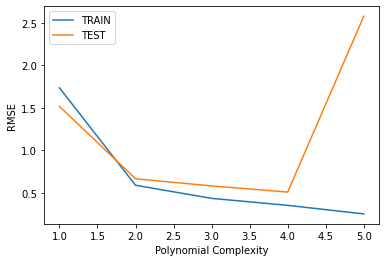

In [65]:
# clip degree 1 - 5
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

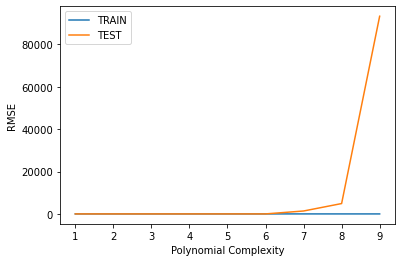

In [66]:
# ga di clip, full
plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
plt.plot(range(1,10),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

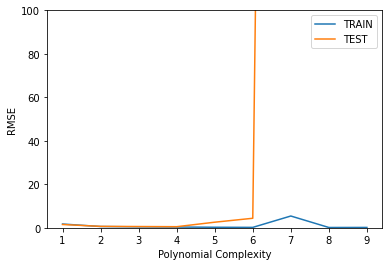

In [67]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
plt.plot(range(1,10),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.ylim(0,100)
plt.legend()

### NOTES PENTING
skrg pertanyaannya, berarti buat dataset ini paling optimal itu pake degree brp? kalo kita liat mentoknya paling rendah sebelum dia jomplang itu kan berarti 4, tapi 2,3,4 itu mirip, jadi ga perlu ambil degree 4 soalnya terlalu risky kan deket sama yg jomplang, jadi bisa consider 2 atau 3 aja, sebenernya 2 udah oke, tapi kalo mau 3 juga gpp

## Finalizing Model Choice

There are now 2 things we need to save, the Polynomial Feature creator AND the model itself. Let's explore how we would proceed from here:

1. Choose final parameters based on test metrics
2. Retrain on all data
3. Save Polynomial Converter object
4. Save model

cara saveloadnya sama pake dump load

In [68]:
# kita putusin ambil degree 3
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [69]:
final_model = LinearRegression()

In [70]:
final_model.fit(final_poly_converter.fit_transform(X),y)

LinearRegression()

### Saving Model and Converter

In [71]:
from joblib import dump, load

In [72]:
# kalo mau save di path lain masukin full path
dump(final_model, 'sales_poly_model.joblib')

['sales_poly_model.joblib']

In [73]:
dump(final_poly_converter,'poly_converter.joblib')

['poly_converter.joblib']

## Deployment and Predictions

### Prediction on New Data

Recall that we will need to **convert** any incoming data to polynomial data, since that is what our model is trained on. We simply load up our saved converter object and only call **.transform()** on the new data, since we're not refitting to a new data set.

**Our next ad campaign will have a total spend of 149k on TV, 22k on Radio, and 12k on Newspaper Ads, how many units could we expect to sell as a result of this?**

In [74]:
# contoh lagi kek sebelumnya, misal kita kirim ke co-worker kita
# terus co-worker kita mau load terus pake

# pake data yang sama kek kemaren simple linear reg

In [75]:
loaded_poly = load('poly_converter.joblib')
loaded_model = load('sales_poly_model.joblib')

In [76]:
campaign = [[149,22,12]]

In [77]:
campaign_poly = loaded_poly.transform(campaign)

/Users/clcx/miniforge3/envs/tf-arm64/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [79]:
campaign_poly

array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

In [80]:
# ada 19 features soalnya degree 3
campaign_poly.shape

(1, 19)

In [81]:
final_model.predict(campaign_poly)

array([14.64501014])

In [82]:
# ini hasil yang pas kemaren pake simple linear regression
# array([13.893032])